In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
epochs = 300
lr = 1.4e-2
lr_decay=0.999
reg = 5e-5
batch_size = Ntr
val_batch_size = Nte
loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
def accuracy(predict,labels):
    predict_class = np.argmax(predict, axis=1)
    g_truth = np.argmax(labels, axis=1)
    accu_predict = [predict_class == g_truth]
    return 100*np.sum(accu_predict)/len(g_truth)
for t in range(1,epochs+1):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  #indices = rng.choice(Ntr, batch_size)
  x = x_train[indices]
  y = y_train[indices]

  y_pred = x.dot(w1)+b1
  train_accuracy = accuracy(y_pred, y)
  train_acc_history.append(train_accuracy)
  loss = 1./(batch_size*2)*np.square(y_pred-y).sum()+ reg/(batch_size*2)*(np.sum(w1*w1))
  loss_history.append(loss)
  y_val_pred = x_test.dot(w1)+b1
  val_loss = 1./(val_batch_size*2)*np.square(y_val_pred-y_test).sum()
  val_loss_history.append(val_loss)
  val_accuracy = accuracy(y_val_pred, y_test)
  val_acc_history.append(val_accuracy)
  
  if t%10 ==0 or t == epochs:
    print('Epochs %d/%d: Training Loss: %f, Validation Loss: %f,  Training Accuracy: %f, Validation Accuracy: %f'%(t, epochs,loss,val_loss, train_accuracy, val_accuracy))

  dw1 = 1./batch_size*(x.T.dot(y_pred - y)) + 1./batch_size*reg*w1
  w1 -= lr*dw1

  db1 = 1./batch_size*((y_pred-y).sum(axis =0))
  b1 -= lr*db1

  lr=lr*lr_decay




w1: (3072, 10)
b1: (10,)
Epochs 10/300: Training Loss: 0.455622, Validation Loss: 0.455282,  Training Accuracy: 32.270000, Validation Accuracy: 32.290000
Epochs 20/300: Training Loss: 0.439871, Validation Loss: 0.439655,  Training Accuracy: 35.164000, Validation Accuracy: 34.930000
Epochs 30/300: Training Loss: 0.429669, Validation Loss: 0.429534,  Training Accuracy: 36.478000, Validation Accuracy: 36.220000
Epochs 40/300: Training Loss: 0.422322, Validation Loss: 0.422250,  Training Accuracy: 37.150000, Validation Accuracy: 37.360000
Epochs 50/300: Training Loss: 0.416828, Validation Loss: 0.416813,  Training Accuracy: 37.654000, Validation Accuracy: 37.750000
Epochs 60/300: Training Loss: 0.412641, Validation Loss: 0.412680,  Training Accuracy: 38.100000, Validation Accuracy: 38.140000
Epochs 70/300: Training Loss: 0.409408, Validation Loss: 0.409500,  Training Accuracy: 38.450000, Validation Accuracy: 38.450000
Epochs 80/300: Training Loss: 0.406881, Validation Loss: 0.407026,  Trai

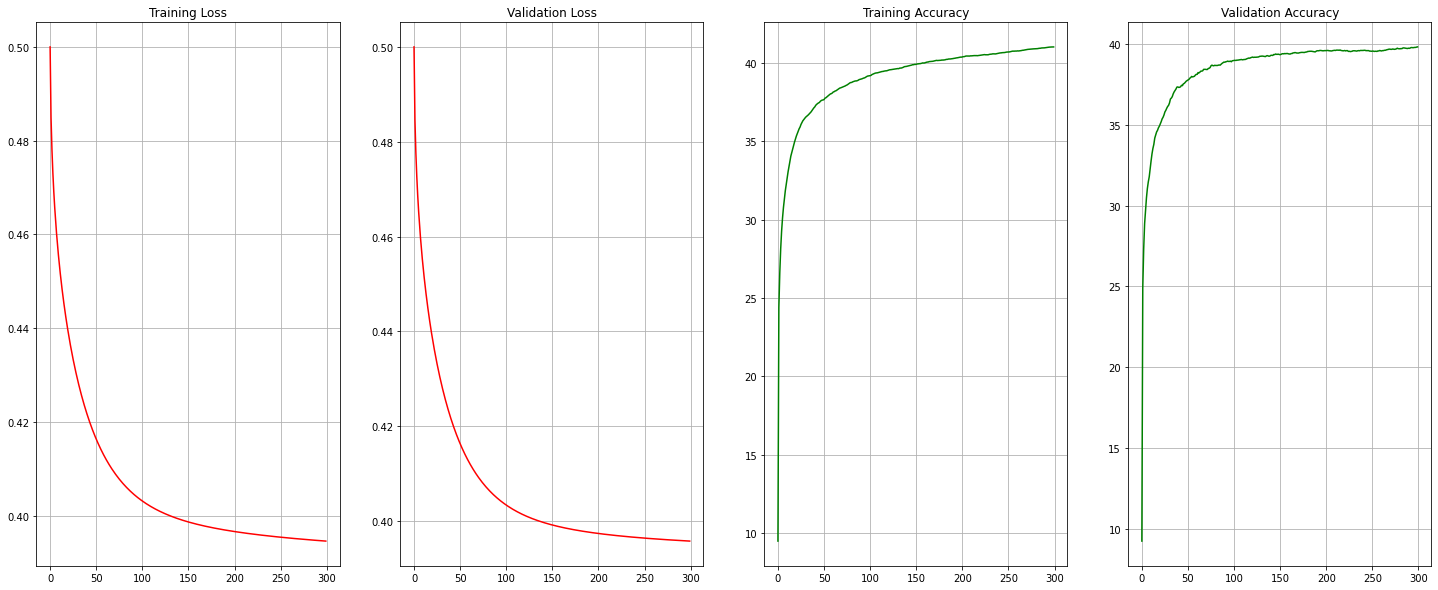

In [8]:
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(25,10))
item1 = {"Training Loss":loss_history, "Validation Loss":val_loss_history}
i = 1
for key in item1.keys():
    plt.subplot(1,4,i);plt.plot(item1[key],'r')
    plt.title(key)
    plt.grid()
    i+=1
item2={"Training Accuracy":train_acc_history, "Validation Accuracy": val_acc_history}
j= 3
for key in item2.keys():
    plt.subplot(1,4,j);plt.plot(item2[key], 'g')
    plt.title(key)
    plt.grid(True)
    j+=1

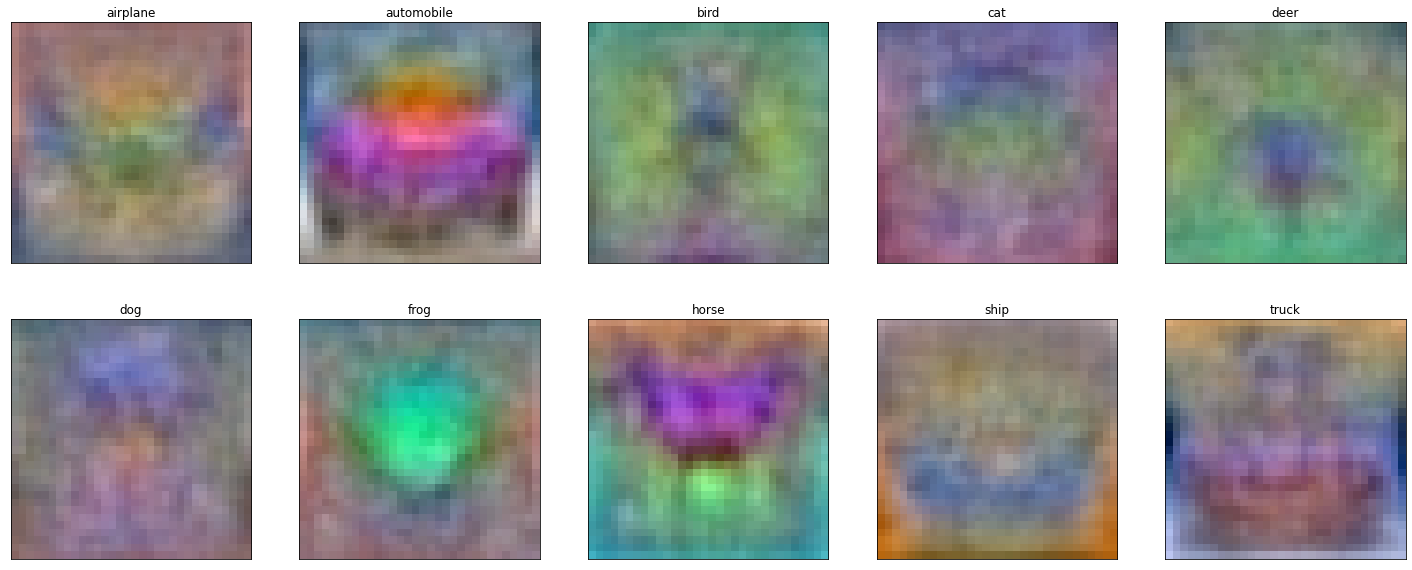

In [10]:
w1 =  w1- np.min(w1)# Making the minimum weight zero.
im_=(w1/np.max(w1))*255
img = im_.astype('uint8')
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = img[:,i].reshape(32,32,3)
    plt.subplot(2,5,location),plt.imshow(image[:,:,::-1])
    plt.title(classes[i]),
    plt.xticks([])
    plt.yticks([])      
    location+=1

plt.show()